In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Creating Duplicate Rows

In [19]:
# Load in Data
reptilia = pd.read_csv('reptilia_genus_occ_all.csv', encoding='latin-1')
synapsida = pd.read_csv('synapsida_genus_occ_all.csv', encoding='latin-1')
temnospondyli = pd.read_csv('temnospondyli_genus_occ_all.csv', encoding='latin-1')

## Reptilia 

### EDA 

In [20]:
reptilia.head()

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
0,N84,NaN,NaN,an individual seprated from the 11753 b and c ...,NaN,NaN,Reptilia,Rhynchosauridae,Stenaulorhynchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N83,NaN,NaN,lower jaw and humerus,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N82,NaN,NaN,foot,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N81,NaN,NaN,maxilla,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N80,NaN,NaN,partial skull,NaN,NaN,Reptilia,Rhynchosauridae,Eohyosaurus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test = reptilia[reptilia['abund_unit']=='individuals']
test

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
170,1658055,body,excellent,skeletons,1.0,individuals,Reptilia,Mixosauridae,Mixosaurus,marine,...,NaN,Mixosaurus luxiensis (HFUT HL-21-08-002) a nea...,NaN,NaN,NaN,NaN,life position,NaN,HFUT HL-21-08-002 is accessioned in the collec...,NaN
178,1643172,body,good,skeletons,1.0,individuals,Reptilia,NO_FAMILY_SPECIFIED,Dianmeisaurus,marine,...,NaN,Dianmeisaurus mutaensis (HFUT MT-21-08-001) a ...,NaN,NaN,NaN,NaN,life position,NaN,The skeleton was split into two parts during c...,NaN
186,1638608,body,good,NaN,6.0,individuals,Reptilia,Procolophonidae,Hwiccewyrm,terrestrial,...,NaN,NaN,parautochthonous,NaN,NaN,#NAME?,preferred,NaN,"University of Bristol, Geology Department. The...","Whiteside states that ""Clevosaurus is found in..."
189,1633862,"body,adpression",NaN,NaN,1.0,individuals,Reptilia,Nothosauridae,Lariosaurus,marine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1632821,"body,mold/impression",good,NaN,1.0,individuals,Reptilia,Saurosphargidae,Prosaurosphargis,terrestrial,...,NaN,NaN,NaN,NaN,NaN,#NAME?,life position,NaN,Geological Museum of Hefei University of Techn...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,149917,body,good,NaN,2.0,individuals,Reptilia,Rauisuchidae,Postosuchus,terrestrial,...,NaN,NaN,parautochthonous,snapshot,concentrate,#NAME?,NaN,common,The quarry is 90 x 90 m in size and the bone b...,"""...various unknown microvertebrates were reco..."
3095,149867,"body,concretion",medium,NaN,1.0,individuals,Reptilia,Lagerpetidae,Lagerpeton,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3096,149866,"body,concretion",medium,NaN,1.0,individuals,Reptilia,Silesauridae,Lewisuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3139,147523,body,good,NaN,2.0,individuals,Reptilia,Araeoscelidae,Araeoscelis,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
test['abund_value'].sum()

# We need to see the sum of the 'abund_value' column in order to see how many individuals there are total
# The sum of the test dataframe's 'abund_value" column should be = to 
# the number of rows it has at the end of the row duplication processing

2032.0

### Duplicating Formula

In [23]:
reptilia['abund_unit'].isna().sum()

1175

In [24]:
reptilia['abund_unit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3145 entries, 0 to 3144
Series name: abund_unit
Non-Null Count  Dtype 
--------------  ----- 
1970 non-null   object
dtypes: object(1)
memory usage: 24.7+ KB


In [25]:
reptilia['abund_value'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3145 entries, 0 to 3144
Series name: abund_value
Non-Null Count  Dtype  
--------------  -----  
1970 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


In [26]:
# Function to duplicate rows
def duplicate_rows(row):
    if pd.isna(row['abund_value']) or pd.isna(row['abund_unit']): # If either value is null
        return pd.DataFrame([row]) # Keep rows with null values 
    if row['abund_unit'] == 'individuals': # If the abund_unit is individuals
        count = int(row['abund_value'])
        if count == 1: # and the abund_value is 1, just keep that row
            return pd.DataFrame([row])
        if count > 1: # If the abund_value is greater than 1, create a copy of it
            new_row = row.copy()
            new_row['abund_value'] = 1.0 # Set new 'abund_value' to 1
            return pd.DataFrame([new_row] * count) # Duplicate the new row by the 'abund_value"
    return pd.DataFrame([row])


In [27]:
# Apply the function to each row and concatenate the results
reptilia_dup = pd.concat(reptilia.apply(duplicate_rows, axis=1).tolist(), ignore_index=True)

In [29]:

reptilia[['county', 'state']].isna().sum(), reptilia_dup[['county', 'state']].isna().sum()

(county    920
 state     197
 dtype: int64,
 county    1495
 state      212
 dtype: int64)

### Visual Check

In [11]:
reptilia_dup.head()

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
0,N84,NaN,NaN,an individual seprated from the 11753 b and c ...,NaN,NaN,Reptilia,Rhynchosauridae,Stenaulorhynchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N83,NaN,NaN,lower jaw and humerus,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N82,NaN,NaN,foot,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N81,NaN,NaN,maxilla,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N80,NaN,NaN,partial skull,NaN,NaN,Reptilia,Rhynchosauridae,Eohyosaurus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Looking to see reptilia_dup where 'abund_unit' == 'individuals', to make sure 'abund_value' is 1
reptilia_dup[reptilia_dup['abund_unit']=='individuals']

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
170,1658055,body,excellent,skeletons,1.0,individuals,Reptilia,Mixosauridae,Mixosaurus,marine,...,NaN,Mixosaurus luxiensis (HFUT HL-21-08-002) a nea...,NaN,NaN,NaN,NaN,life position,NaN,HFUT HL-21-08-002 is accessioned in the collec...,NaN
178,1643172,body,good,skeletons,1.0,individuals,Reptilia,NO_FAMILY_SPECIFIED,Dianmeisaurus,marine,...,NaN,Dianmeisaurus mutaensis (HFUT MT-21-08-001) a ...,NaN,NaN,NaN,NaN,life position,NaN,The skeleton was split into two parts during c...,NaN
186,1638608,body,good,NaN,1.0,individuals,Reptilia,Procolophonidae,Hwiccewyrm,terrestrial,...,NaN,NaN,parautochthonous,NaN,NaN,#NAME?,preferred,NaN,"University of Bristol, Geology Department. The...","Whiteside states that ""Clevosaurus is found in..."
187,1638608,body,good,NaN,1.0,individuals,Reptilia,Procolophonidae,Hwiccewyrm,terrestrial,...,NaN,NaN,parautochthonous,NaN,NaN,#NAME?,preferred,NaN,"University of Bristol, Geology Department. The...","Whiteside states that ""Clevosaurus is found in..."
188,1638608,body,good,NaN,1.0,individuals,Reptilia,Procolophonidae,Hwiccewyrm,terrestrial,...,NaN,NaN,parautochthonous,NaN,NaN,#NAME?,preferred,NaN,"University of Bristol, Geology Department. The...","Whiteside states that ""Clevosaurus is found in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,149867,"body,concretion",medium,NaN,1.0,individuals,Reptilia,Lagerpetidae,Lagerpeton,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4361,149866,"body,concretion",medium,NaN,1.0,individuals,Reptilia,Silesauridae,Lewisuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4404,147523,body,good,NaN,1.0,individuals,Reptilia,Araeoscelidae,Araeoscelis,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4405,147523,body,good,NaN,1.0,individuals,Reptilia,Araeoscelidae,Araeoscelis,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# There should no longer be any instances where 'individuals' have an 'abund_value' > 1. Let's check
reptilia_dup[(reptilia_dup['abund_value'] > 1) & (reptilia_dup['abund_unit'] == 'individuals')]

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments


In [14]:
reptilia_dup[reptilia_dup['abund_unit'].isna()]

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
0,N84,NaN,NaN,an individual seprated from the 11753 b and c ...,NaN,NaN,Reptilia,Rhynchosauridae,Stenaulorhynchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N83,NaN,NaN,lower jaw and humerus,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N82,NaN,NaN,foot,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N81,NaN,NaN,maxilla,NaN,NaN,Reptilia,Rhynchosauridae,Mesosuchus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N80,NaN,NaN,partial skull,NaN,NaN,Reptilia,Rhynchosauridae,Eohyosaurus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,149243,body,good,NaN,NaN,NaN,Reptilia,NO_FAMILY_SPECIFIED,Planocephalosaurus,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,common,Material in University of Aberdeen palaeontolo...,NaN
4400,149242,body,good,NaN,NaN,NaN,Reptilia,NO_FAMILY_SPECIFIED,Terrestrisuchus,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,common,Material in University of Aberdeen palaeontolo...,NaN
4401,149241,body,good,NaN,NaN,NaN,Reptilia,NO_FAMILY_SPECIFIED,Diphydontosaurus,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,common,Material in University of Aberdeen palaeontolo...,NaN
4402,149239,body,good,NaN,NaN,NaN,Reptilia,NO_FAMILY_SPECIFIED,Diphydontosaurus,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,NaN,Material in University of Aberdeen palaeontolo...,NaN


In [15]:
# Visual checks
# "abund_value" where "abund_unit" is "specimens" should have values 1+
reptilia_dup[reptilia_dup['abund_unit'] == "specimens"]

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,family,genus,taxon_environment,...,artifacts,component_comments,spatial_resolution,temporal_resolution,lagerstatten,concentration,orientation,abund_in_sediment,collection_comments,taxonomy_comments
166,1660033,body,NaN,NaN,1.0,specimens,Reptilia,Stagonolepididae,Garzapelta,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,1659629,body,NaN,NaN,10.0,specimens,Reptilia,Drepanosauridae,Unguinychus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""The Homestead Site at Garita Creek is located...",NaN
172,1651915,body,excellent,"partial skeletons,skulls,postcrania,limb eleme...",1.0,specimens,Reptilia,NO_FAMILY_SPECIFIED,Prestosuchus,terrestrial,...,NaN,"It is partially exposed in a large rock block,...",NaN,NaN,NaN,concentrated,life position,common,The specimen is housed at the Universidade Lut...,NaN
173,1651914,body,NaN,teeth,1.0,specimens,Reptilia,Shastasauridae,Ichthyotitan,marine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repository: Institute of Geological Sciences M...,NaN
174,1648024,body,excellent,NaN,1.0,specimens,Reptilia,Pachypleurosauridae,Luopingosaurus,marine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wuhan Institute of Geology and Mineral Recours...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,149244,body,good,NaN,1.0,specimens,Reptilia,Sphenodontidae,Sigmala,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,common,Material in University of Aberdeen palaeontolo...,NaN
4403,149237,body,good,NaN,1.0,specimens,Reptilia,Clevosauridae,Clevosaurus,terrestrial,...,NaN,NaN,NaN,condensed,NaN,concentrated,NaN,NaN,Material in University of Aberdeen palaeontolo...,NaN
4406,147521,body,NaN,NaN,10.0,specimens,Reptilia,Procolophonidae,Procolophon,terrestrial,...,NaN,NaN,NaN,snapshot,NaN,NaN,NaN,NaN,NaN,Carroll & Lindsay (1985) list two non-type spe...
4407,146087,body,NaN,NaN,3.0,specimens,Reptilia,Kuehneosauridae,Kuehneosaurus,terrestrial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Length Check Formula

In [16]:
# The new dataframe post-duplication should be = 
# the sum of the 'abund_value' column in the original dataframe where 'abund_unit' == 'individuals'
# plus the number of rows in the original dataframe where 'abund_unit' != 'individuals'

def length_check(df_original, df_result):
    # Count of rows in original df where 'abund_unit' is not 'individuals'
    non_individuals = df_original[df_original['abund_unit']!='individuals'].shape[0] 

    # Sum of 'abund_value' where 'abund_unit' is 'individuals'
    individuals_sum = df_original[df_original['abund_unit']=='individuals']['abund_value'].sum()

    goal_size = non_individuals + individuals_sum
    returned_size = df_result.shape[0]

    return goal_size, returned_size



In [17]:
length_check(reptilia, reptilia_dup)

(4411.0, 4411)

## Synapsida

In [18]:
# Apply the function to each row and concatenate the results
synapsida_dup = pd.concat(synapsida.apply(duplicate_rows, axis=1).tolist(), ignore_index=True)

In [19]:
# Length_check
length_check(synapsida, synapsida_dup)

(3422.0, 3422)

In [20]:
# Visual checks
synapsida_dup.head()

,occurrence_no,common_body_parts,pres_mode,preservation_quality,abund_value,abund_unit,class,order,family,genus,...,collection_comments,taxonomy_comments,taxon_environment,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
0,N510,crnio parcial,NaN,NaN,NaN,NaN,Synapsida,Therapsida,Traversodontidae,Massetognathus,...,NaN,NaN,NaN,NaN,-,Candel ria,Sanga Becker,Pinheiro Area,Museum,NaN
1,N509,skull,NaN,NaN,NaN,NaN,Synapsida,Therapsida,Kannemeyeriidae,Dinodontosaurus,...,NaN,NaN,NaN,NaN,pedroanum,Bom Retiro do Sul,Porto Mariante 2,Porto Mariante,Museum,NaN
2,N508,-,NaN,NaN,NaN,NaN,Synapsida,Therapsida,Kannemeyeriidae,Dinodontosaurus,...,NaN,NaN,NaN,NaN,oliveirai? pedroanum?,Candel ria,Sanga do Janguta,Pinheiro Area,Museum,NaN
3,N507,-,NaN,NaN,NaN,NaN,Synapsida,Therapsida,Traversodontidae,Santacruzodon,...,NaN,NaN,NaN,NaN,hopsoni,Santa Cruz do Sul,Schoenstatt,Schoenstatt,Museum,NaN
4,N506,-,NaN,NaN,NaN,NaN,Synapsida,Therapsida,Traversodontidae,Santacruzodon,...,NaN,NaN,NaN,NaN,hopsoni,Santa Cruz do Sul,Schoenstatt,Schoenstatt,Museum,NaN


In [21]:
#Visual checks
# Looking to see synapsida_dup where 'abund_unit' == 'individuals', to make sure 'abund_value' is 1
synapsida_dup[synapsida_dup['abund_unit']=='individuals']

,occurrence_no,common_body_parts,pres_mode,preservation_quality,abund_value,abund_unit,class,order,family,genus,...,collection_comments,taxonomy_comments,taxon_environment,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
311,1651629,NaN,body,excellent,1.0,individuals,Osteichthyes,Cotylosauria,Gorgonopidae,Aelurognathus,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
318,1651605,"skulls,partial skulls,mandibles",body,good,1.0,individuals,Osteichthyes,Cotylosauria,Gorgonopidae,Gorgonops,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
319,1651605,"skulls,partial skulls,mandibles",body,good,1.0,individuals,Osteichthyes,Cotylosauria,Gorgonopidae,Gorgonops,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
334,1640198,partial skulls,body,medium,1.0,individuals,Osteichthyes,Anomodontia,NO_FAMILY_SPECIFIED,Colobodectes,...,The specimen (skull BP/1/8353) was mechanicall...,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
376,1558904,footprints,"cast,mold/impression,trace",NaN,1.0,individuals,Osteichthyes,Dicynodontia,NO_FAMILY_SPECIFIED,Pentasauropus,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,229267,NaN,body,NaN,1.0,individuals,Osteichthyes,Dicynodontia,Pylaecephalidae,Diictodon,...,"ETE Size: .; ETE reference list: 478, ; ETE mu...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3409,229267,NaN,body,NaN,1.0,individuals,Osteichthyes,Dicynodontia,Pylaecephalidae,Diictodon,...,"ETE Size: .; ETE reference list: 478, ; ETE mu...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3410,229267,NaN,body,NaN,1.0,individuals,Osteichthyes,Dicynodontia,Pylaecephalidae,Diictodon,...,"ETE Size: .; ETE reference list: 478, ; ETE mu...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3411,229267,NaN,body,NaN,1.0,individuals,Osteichthyes,Dicynodontia,Pylaecephalidae,Diictodon,...,"ETE Size: .; ETE reference list: 478, ; ETE mu...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Visual checks
# There should no longer be any instances where 'individuals' have an 'abund_value' > 1. Let's check
synapsida_dup[(synapsida_dup['abund_value'] > 1) & (synapsida_dup['abund_unit'] == 'individuals')]

,occurrence_no,common_body_parts,pres_mode,preservation_quality,abund_value,abund_unit,class,order,family,genus,...,collection_comments,taxonomy_comments,taxon_environment,composition,species,municipality,outcrop_details,outcrop_overview,source,ref


In [23]:
# Visual checks
# "abund_value" where "abund_unit" is "specimens" should have values 1+
synapsida_dup[synapsida_dup['abund_unit'] == "specimens"]

,occurrence_no,common_body_parts,pres_mode,preservation_quality,abund_value,abund_unit,class,order,family,genus,...,collection_comments,taxonomy_comments,taxon_environment,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
324,1645218,NaN,body,good,1.0,specimens,Osteichthyes,Cotylosauria,Traversodontidae,Paratraversodon,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
325,1645217,NaN,body,NaN,2.0,specimens,Osteichthyes,Cotylosauria,Chiniquodontidae,Riojanodon,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
326,1642297,NaN,body,NaN,2.0,specimens,Osteichthyes,Dicynodontia,NO_FAMILY_SPECIFIED,Jimusaria,...,NaN,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
330,1640227,partial skulls,body,good,1.0,specimens,Osteichthyes,Anomodontia,NO_FAMILY_SPECIFIED,Colobodectes,...,"NMQR, National Museum, Bloemfontein, South Africa",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
331,1640226,partial skulls,body,good,1.0,specimens,Osteichthyes,Anomodontia,NO_FAMILY_SPECIFIED,Colobodectes,...,"BP, Bernard Price Institute for Palaeontologic...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,229268,NaN,NaN,NaN,14.0,specimens,Osteichthyes,Dicynodontia,Pylaecephalidae,Diictodon,...,"ETE Size: .; ETE reference list: 478, ; ETE mu...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3415,157309,NaN,body,NaN,30.0,specimens,Osteichthyes,Cotylosauria,Ophiacodontidae,Ophiacodon,...,All of the in situ specimens recovered from th...,"authors report minimum number of individuals, ...",terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3417,149837,NaN,"body,coprolite",good,1.0,specimens,Osteichthyes,Cotylosauria,NO_FAMILY_SPECIFIED,Adelobasileus,...,"""More than three metric tons of sediment...wer...",NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
3420,148250,NaN,body,NaN,11.0,specimens,Osteichthyes,Cotylosauria,Ophiacodontidae,Ophiacodon,...,Romer (1928) paper is a review of vertebrates ...,NaN,terrestrial,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN


## Temnospondyli

In [24]:
# Apply the function to each row and concatenate the results
temnospondyli_dup = pd.concat(temnospondyli.apply(duplicate_rows, axis=1).tolist(), ignore_index=True)

In [25]:
# Length_check
length_check(temnospondyli, temnospondyli_dup)

(2247.0, 2247)

In [26]:
# Visual checks
temnospondyli_dup.head()

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,order,family,genus,...,collection_dates,collection_comments,taxonomy_comments,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
0,N9,NaN,NaN,small mandibular fragment,NaN,NaN,Amphibia,Temnospondyli,Chigutisauridae,Compsocerops,...,NaN,NaN,NaN,NaN,cosgriffi,S?o Jo?o do Polsine,Buriol,Buriol,Literature,Dias?da?Silva
1,N8,NaN,NaN,dermal fragment that comprises most of the orb...,NaN,NaN,Amphibia,Temnospondyli,Chigutisauridae,Compsocerops,...,NaN,NaN,NaN,NaN,cosgriffi,S?o Jo?o do Polsine,Buriol,Buriol,Literature,Dias?da?Silva
2,N7,NaN,NaN,an almost complete left lower jaw,NaN,NaN,Amphibia,Temnospondyli,Rhinesuchidae,Rastosuchus,...,NaN,NaN,NaN,NaN,hammeri,Ortigueira,t£nel ferrovi rio 12 - abertura sul,T£nel 12,Literature,Dias
3,N6,NaN,NaN,right portion of an intermediate mandibular fr...,NaN,NaN,Amphibia,Temnospondyli,Rhinesuchidae,Rastosuchus,...,NaN,NaN,NaN,NaN,hammeri,Ortigueira,t£nel ferrovi rio 12 - abertura sul,T£nel 12,Literature,Dias
4,N5,NaN,NaN,"clavicle, cleithrum, scapulocoracoid, femur, d...",NaN,NaN,Amphibia,Temnospondyli,Rhinesuchidae,Rastosuchus,...,NaN,NaN,NaN,NaN,hammeri,Ortigueira,t£nel ferrovi rio 12 - abertura sul,T£nel 12,Literature,Dias


In [27]:
#Visual checks
# Looking to see synapsida_dup where 'abund_unit' == 'individuals', to make sure 'abund_value' is 1
temnospondyli_dup[temnospondyli_dup['abund_unit']=='individuals']

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,order,family,genus,...,collection_dates,collection_comments,taxonomy_comments,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
35,1639000,body,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Trematosauridae,Trematosaurus,...,1913,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
43,1576258,body,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Metoposauridae,Metoposaurus,...,1965,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
55,1558912,"body,cast,mold/impression,trace",good,"partial skeletons,footprints",1.0,individuals,Amphibia,Temnospondyli,NO_FAMILY_SPECIFIED,Capitosauroides,...,>1935,"Near the town of Winterswijk, in the mid-easte...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
120,1423653,body,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,NO_FAMILY_SPECIFIED,Promastodonsaurus,...,1959,"PVL: Instituto de Miguel Lillo, Tucuman, Argen...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
323,1395971,body,medium,NaN,1.0,individuals,Amphibia,Temnospondyli,NO_FAMILY_SPECIFIED,Arachana,...,NaN,"FC-DPV = Departamento de Paleontologia, Facult...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,221286,NaN,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Trimerorhachidae,Trimerorhachis,...,NaN,"ETE Size: .; ETE reference list: 478, 482, 485...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2223,221286,NaN,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Trimerorhachidae,Trimerorhachis,...,NaN,"ETE Size: .; ETE reference list: 478, 482, 485...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2224,221286,NaN,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Trimerorhachidae,Trimerorhachis,...,NaN,"ETE Size: .; ETE reference list: 478, 482, 485...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2225,221286,NaN,NaN,NaN,1.0,individuals,Amphibia,Temnospondyli,Trimerorhachidae,Trimerorhachis,...,NaN,"ETE Size: .; ETE reference list: 478, 482, 485...",NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Visual checks
# There should no longer be any instances where 'individuals' have an 'abund_value' > 1. Let's check
temnospondyli_dup[(temnospondyli_dup['abund_value'] > 1) & (temnospondyli_dup['abund_unit'] == 'individuals')]

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,order,family,genus,...,collection_dates,collection_comments,taxonomy_comments,composition,species,municipality,outcrop_details,outcrop_overview,source,ref


In [29]:
# Visual checks
# "abund_value" where "abund_unit" is "specimens" should have values 1+
temnospondyli_dup[temnospondyli_dup['abund_unit'] == "specimens"]

,occurrence_no,pres_mode,preservation_quality,common_body_parts,abund_value,abund_unit,class,order,family,genus,...,collection_dates,collection_comments,taxonomy_comments,composition,species,municipality,outcrop_details,outcrop_overview,source,ref
23,1642296,body,NaN,NaN,1.0,specimens,Amphibia,Temnospondyli,NO_FAMILY_SPECIFIED,Trypanognathus,...,NaN,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
24,1642295,body,NaN,NaN,2.0,specimens,Amphibia,Temnospondyli,Eryopidae,Stenokranio,...,NaN,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
37,1598132,mold/impression,NaN,NaN,1.0,specimens,Amphibia,Temnospondyli,Zatracheidae,Chemnitzion,...,NaN,Repository: Museum fÃ¼r Naturkunde Chemnitz,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
38,1589314,body,NaN,NaN,4.0,specimens,Amphibia,Temnospondyli,Metoposauridae,Anaschisma,...,NaN,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
42,1576259,body,medium,NaN,15.0,specimens,Amphibia,Temnospondyli,Metoposauridae,Metoposaurus,...,1965,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,148244,body,NaN,NaN,2.0,specimens,Amphibia,Temnospondyli,Dissorophidae,Aspidosaurus,...,NaN,Romer (1928) paper is a review of vertebrates ...,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2243,148243,body,NaN,NaN,56.0,specimens,Amphibia,Temnospondyli,Eryopidae,Eryops,...,NaN,Romer (1928) paper is a review of vertebrates ...,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2244,147564,body,medium,NaN,2.0,specimens,Amphibia,Temnospondyli,Dissorophidae,Broiliellus,...,NaN,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN
2245,147563,body,medium,NaN,6.0,specimens,Amphibia,Temnospondyli,Dissorophidae,Broiliellus,...,NaN,NaN,NaN,phosphatic,NaN,NaN,NaN,NaN,NaN,NaN


## Saving Duplicated Row DF's

In [30]:
reptilia_dup.to_csv('reptilia_dup.csv', index=False)
synapsida_dup.to_csv('synapsida_dup.csv', index=False)
temnospondyli_dup.to_csv('temnospondyli_dup.csv', index=False)

# Age Graphs
Partially taken from test_reptilia/test_eda.ipyb

In [31]:
# Reading in the data again so I don't have to run the above code again

reptilia_dup = pd.read_csv('reptilia_dup.csv')
synapsida_dup = pd.read_csv('synapsida_dup.csv')    
temnospondyli_dup = pd.read_csv('temnospondyli_dup.csv')

In [32]:
reptilia_dup.columns

Index(['occurrence_no', 'pres_mode', 'preservation_quality',
       'common_body_parts', 'abund_value', 'abund_unit', 'class', 'family',
       'genus', 'taxon_environment', 'life_habit', 'diet', 'early_interval',
       'late_interval', 'time_bins', 'museum', 'collection_no', 'age_max',
       'age_min', 'age_median', 'age_uncer_range', 'lng', 'lat', 'environment',
       'occurrence_comments', 'cc', 'state', 'county', 'formation',
       'stratgroup', 'member', 'zone', 'accepted_rank', 'ref_author',
       'ref_pubyr', 'reference_no.x', 'collection_name', 'collection_subset',
       'collection_aka', 'latlng_basis', 'latlng_precision', 'geogscale',
       'geogcomments', 'paleomodel', 'geoplate', 'paleoage', 'paleolng',
       'paleolat', 'paleomodel2', 'geoplate2', 'paleoage2', 'paleolng2',
       'paleolat2', 'paleomodel3', 'geoplate3', 'paleoage3', 'paleolng3',
       'paleolat3', 'protected', 'stratscale', 'localsection', 'localbed',
       'stratcomments', 'lithdescript', 'litho

In [33]:
reptilia_dup[['age_max', 'age_min', 'age_median', 'age_uncer_range']]

,age_max,age_min,age_median,age_uncer_range
0,247.200,242.0,244.600,5.200
1,247.200,242.0,244.600,5.200
2,247.200,242.0,244.600,5.200
3,247.200,242.0,244.600,5.200
4,247.200,242.0,244.600,5.200
...,...,...,...,...
4406,251.902,247.2,249.551,4.702
4407,208.500,201.4,204.950,7.100
4408,208.500,201.4,204.950,7.100
4409,227.000,208.5,217.750,18.500


In [34]:
reptilia_dup.shape

(4411, 91)

In [36]:
# Custom function to plot age RANGE (x) frequency (y) with log scale
def range_plot(df, df_name):
    # Count the frequency of each age range
    df['range'] = df.apply(lambda row: (row['age_max'], row['age_min']), axis=1)
    frequency = df['range'].value_counts().sort_index()

    # Create the plot
    fig, ax = plt.subplots(figsize=(12,6))

    # Plot each range as a horizontal line with log-transformed y-values
    for (age_min, age_max), count in frequency.items():
        ax.plot([age_min, age_max], [np.log(count)] * 2, 'b-', linewidth=2)

    # Set the axis labels and title
    ax.set_xlabel('Age')
    ax.set_ylabel('Log(Frequency)')
    ax.set_title(f'{df_name} Age Range Frequency Plot (Log Scale)')

    # Get the x-axis limits
    x_min, x_max = ax.get_xlim()

    # Create ticks for every 1 unit
    ticks = np.arange(np.ceil(x_min), np.floor(x_max) + 1, 1)
    ax.set_xticks(ticks)

    # Create labels for every 5 units
    labels = [str(int(x)) if x % 5 == 0 else '' for x in ticks]
    ax.set_xticklabels(labels)

    # Invert the x-axis
    ax.invert_xaxis()

    # Add grid lines for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add horizontal line at y=log(10)
    ax.axhline(y=np.log(10), color='r', linestyle='--', linewidth=2)

    # Customize y-axis ticks to show original frequency values
    y_ticks = ax.get_yticks()
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{np.exp(y):.0f}' for y in y_ticks])

    # Show the plot
    plt.tight_layout()
    plt.savefig(f'{df_name.lower()}_age_range_plot_log.png', dpi=300)
    plt.show()
    plt.close()

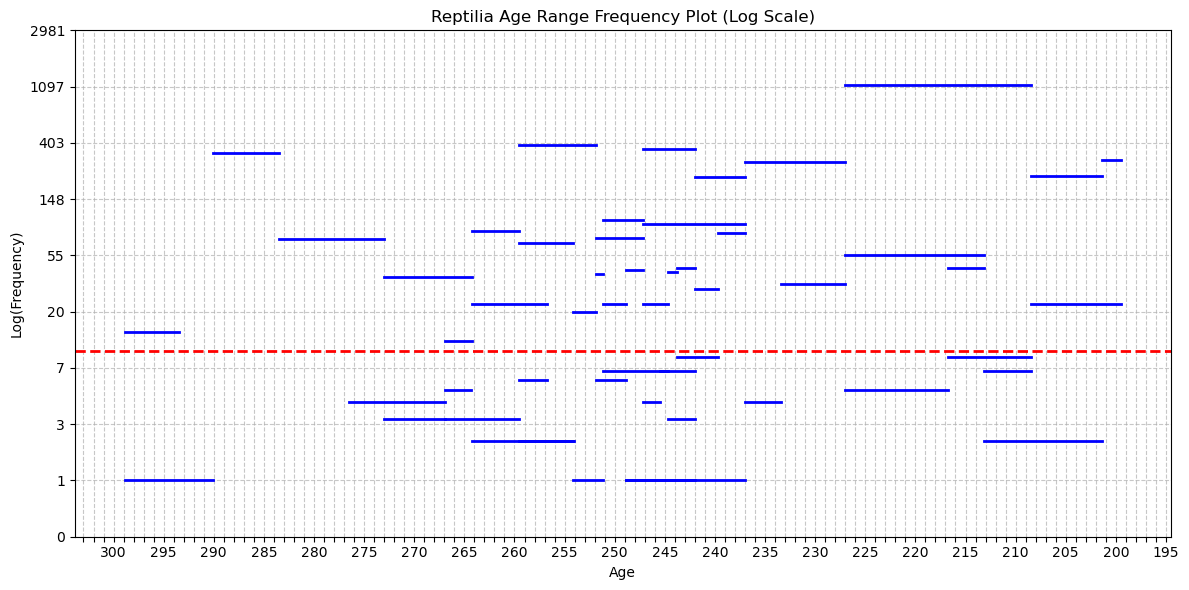

In [37]:
range_plot(reptilia_dup, 'Reptilia')

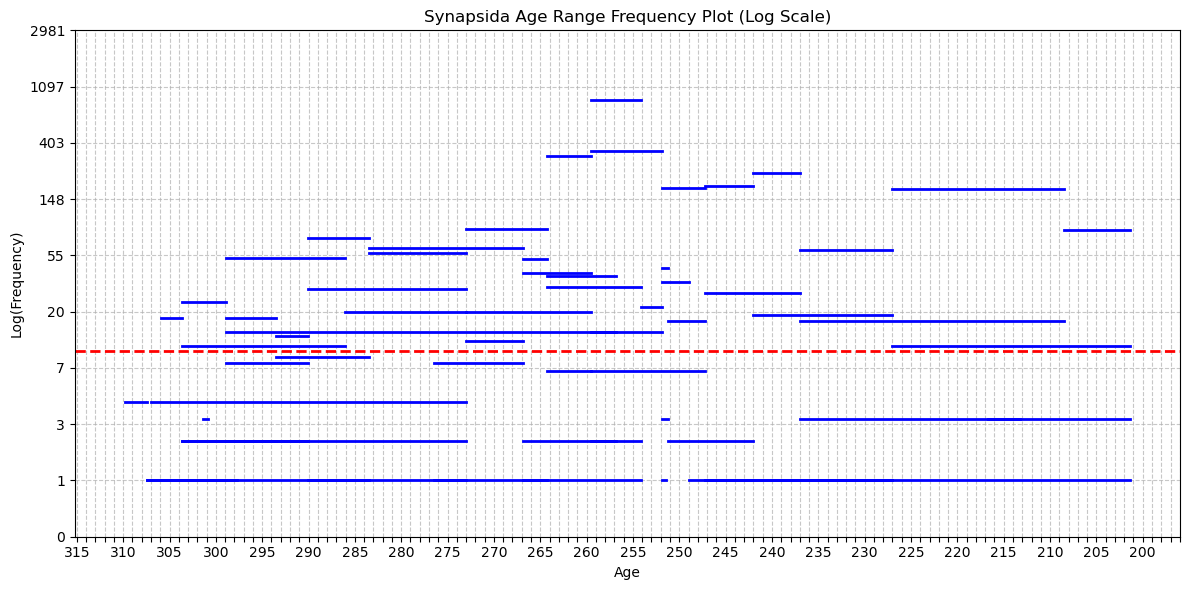

In [38]:
range_plot(synapsida_dup, 'Synapsida')

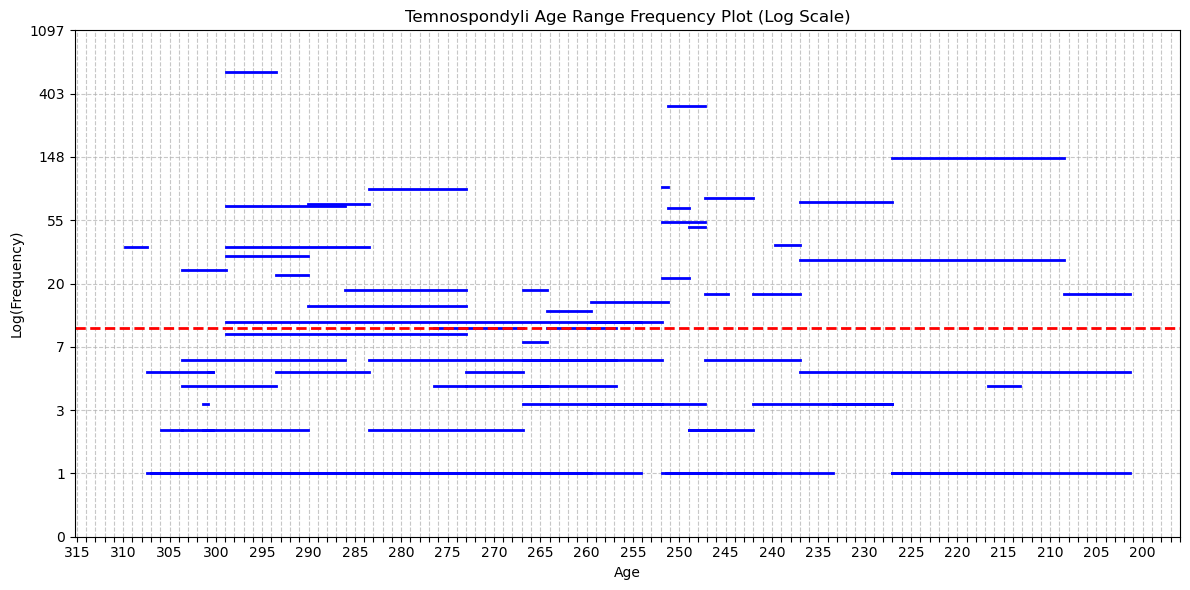

In [39]:
range_plot(temnospondyli_dup, 'Temnospondyli')

# Prepping Final Columns

In [6]:
# Load in data

rep = pd.read_csv('reptilia_dup.csv')
# synap = pd.read_csv('synapsida_dup.csv')
# tem = pd.read_csv('temnospondyli_dup.csv')

## Reptilia

In [7]:
# Finding how many unique sites there are
collections = rep['collection_no'].value_counts()
collections

85494     305
67862     152
52986      78
22683      47
101059     38
         ... 
133310      1
136686      1
137429      1
145501      1
12857       1
Name: collection_no, Length: 1733, dtype: int64

In [9]:
rep.shape

(4411, 91)

In [10]:
4411/1733

2.5452971725331794

In [13]:
rep['state'].isna().sum()

212

In [17]:
test = rep['county'].value_counts
test.info()

AttributeError: 'function' object has no attribute 'info'

In [5]:
# Number of unique sites versus size of dataset
rep.shape

(4411, 91)

In [6]:
# How many sites have only one occurrence (i.e. only one row in the dataset, which = one fossil occurrence as well)
# So also # of singletons
collections[collections == 1]

# I asked one of the creators about this, and they said it's okay to have this number of sites with only one occurrence
# There are 1k singletons

93439     1
93016     1
93617     1
93463     1
93589     1
         ..
133310    1
136686    1
137429    1
145501    1
12857     1
Name: collection_no, Length: 1098, dtype: int64

In [3]:
rep.columns

Index(['occurrence_no', 'pres_mode', 'preservation_quality',
       'common_body_parts', 'abund_value', 'abund_unit', 'class', 'family',
       'genus', 'taxon_environment', 'life_habit', 'diet', 'early_interval',
       'late_interval', 'time_bins', 'museum', 'collection_no', 'age_max',
       'age_min', 'age_median', 'age_uncer_range', 'lng', 'lat', 'environment',
       'occurrence_comments', 'cc', 'state', 'county', 'formation',
       'stratgroup', 'member', 'zone', 'accepted_rank', 'ref_author',
       'ref_pubyr', 'reference_no.x', 'collection_name', 'collection_subset',
       'collection_aka', 'latlng_basis', 'latlng_precision', 'geogscale',
       'geogcomments', 'paleomodel', 'geoplate', 'paleoage', 'paleolng',
       'paleolat', 'paleomodel2', 'geoplate2', 'paleoage2', 'paleolng2',
       'paleolat2', 'paleomodel3', 'geoplate3', 'paleoage3', 'paleolng3',
       'paleolat3', 'protected', 'stratscale', 'localsection', 'localbed',
       'stratcomments', 'lithdescript', 'litho

In [11]:
rep_filtered = rep[["collection_no", "genus", "age_max", "age_min", "lng", "lat", 'formation']]
rep_filtered.head()

,collection_no,genus,age_max,age_min,lng,lat,formation
0,11753,Stenaulorhynchus,247.2,242.0,-53.45,-29.56,Caturrita
1,7838,Mesosuchus,247.2,242.0,-53.45,-29.56,Caturrita
2,6546,Mesosuchus,247.2,242.0,-53.45,-29.56,Caturrita
3,5887,Mesosuchus,247.2,242.0,-53.45,-29.56,Caturrita
4,K11831,Eohyosaurus,247.2,242.0,-53.45,-29.56,Caturrita


## Synapsida

## Temnospondyli